# A QUESTÃO DO NEGÓCIO

A empresa Roof  Imóveis nos contratou pois quer saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais **5 você não recomendaria o investimento de jeito nenhum.**

Utilizando o dataset disponibilizado, iremos aplicar os conceitos aprendidos até o momento em um projeto prático, que busca desenvolver nosso pensamento analítico, insights e tomada de decisões.




# O ENTENDIMENTO DO NEGÓCIO
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro e quer expandir sua área de atuação fazendo um investimento internacional, com isso, ela contratou vocês, para uma consultoria estratégica.

A empresa irá investir em imóveis no Condado de King County, nos Estados Unidos.

***King County - Condado de King - Washington***

O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle.

Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país.





#A Coleta de Dados:
O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. 

Tem um total de 21613 registros com um total de 21 atributos. 

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

**Breve descrição das features disponíveis no dataset:**

id -
Identificador único do imóvel

date - Data da Venda

price - Preço de venda

bedrooms - Nº de Quartos

bathrooms - Nº de Banheiros

sqft_liv - Tamanho de área habitável em ft²

sqft_lot - Tamanho do terreno em ft²

floors - Número de andares

waterfront - Indicativo se o imóvel é a beira-mar

view - Grau de quão belo é a vista do imóvel (0 a 4)

condition - Condição da casa (1 a 5)

grade - Classificação por qualidade de material utilizado na construção

sqft_above - Área em acima do solo em ft²

sqft_basmt - Área em abaixo do solo em ft²

yr_built - Ano de construção

yr_renov - Ano de restauração, caso o contrário, 0.

zipcode - Zip Code 5 - Similar ao CEP

lat - Latitude

long - Longitude

squft_liv15 - Média da área habitável dos 15 imóveis mais próximos, em ft²




## Importando bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Conhecendo o dataset disponibilizado

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Criando nova coluna data para tratar coluna date para tipo data
df['date'] = df['date'].str.strip('T000000')

# Transformando os valore para o tipo data
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='ignore')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# A Limpeza de Dados:

### Valores ausentes

In [ ]:
df.isna().describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613


**Verifica-se que os dados não possuem valores ausentes**

# A Exploração de Dados:

### Imóveis negociados mais de uma vez no período

In [ ]:
#criando uma coluna que conta o número de ocorrências do id no data frame
df['#']= df['id'].apply(lambda x: sum(df.id==x))


In [ ]:
#Número de imóveis negociados mais de uma vez:
len(df[df['#']!=1]['id'].unique())

176

In [ ]:
#Um imóvel aparece 3 vezes:
df[df['#']==3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,#
17602,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,3
17603,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,3
17604,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,3


In [ ]:
#dataframe com id e preço da primeira negociação
df_1 = df[df['id'].duplicated(keep='last')][['id','date','price']]
#dataframe com id e preço da última negociação
df_2 = df[df['id'].duplicated(keep='first')][['id','date','price']]
#calculando o lucro/prejuizo:
df_profit = pd.merge(df_1,df_2,how='left',on='id')
df_profit['profit']= df_profit['price_y']/df_profit['price_x']-1
#removendo a única ocorrência que aparece 3 vezes
df_profit = df_profit.query('id!=795000620')
df_profit

,id,date_x,price_x,date_y,price_y,profit
0,6021501535,2014-07-25,430000.0,2014-12-23,700000.0,0.627907
1,4139480200,2014-06-18,1384000.0,2014-12-09,1400000.0,0.011561
2,7520000520,2014-09-05,232000.0,2015-03-11,240500.0,0.036638
3,3969300030,2014-07-23,165000.0,2014-12-29,239900.0,0.453939
4,2231500030,2014-10-01,315000.0,2015-03-24,530000.0,0.682540
...,...,...,...,...,...,...
174,7853400250,2014-06-04,610000.0,2015-02-19,645000.0,0.057377
175,2724049222,2014-08-02,163800.0,2014-12-01,220000.0,0.343101
176,8564860270,2014-07-08,449990.0,2015-03-03,502000.0,0.115580
177,6300000226,2014-06-26,240000.0,2015-05-04,380000.0,0.583333


In [ ]:
#Imoveis com prejuízo

df_profit[df_profit['profit']<0]

,id,date_x,price_x,date_y,price_y,profit
7,8682262400,2014-07-18,430000.0,2015-05-13,419950.0,-0.023372
42,2726049071,2014-12-11,510000.0,2015-04-08,489950.0,-0.039314
59,4139420590,2014-05-02,1212500.0,2014-08-27,1200000.0,-0.010309
91,2767603612,2014-05-12,500000.0,2015-01-13,489000.0,-0.022000
118,7167000040,2014-08-13,740000.0,2015-03-05,700000.0,-0.054054
137,2619920170,2014-10-01,772500.0,2014-12-19,765000.0,-0.009709


(array([100.,  61.,  11.,   2.,   1.]),
 array([-0.05405405,  0.60035865,  1.25477136,  1.90918407,  2.56359677,
         3.21800948]),
 <BarContainer object of 5 artists>)

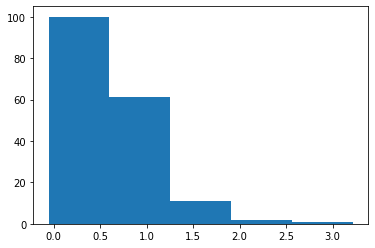

In [ ]:
plt.hist(df_profit['profit'],bins=5)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c52266f70>,
 'caps': [<matplotlib.lines.Line2D at 0x22c52271670>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c52266c10>],
 'medians': [<matplotlib.lines.Line2D at 0x22c52271d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c5227d430>],
 'means': [<matplotlib.lines.Line2D at 0x22c5227d0d0>]}

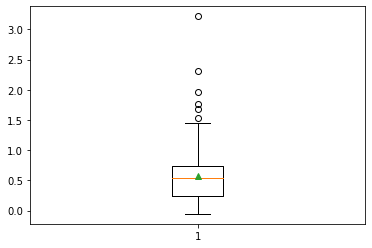

In [ ]:
#verificando a presença de outliers

plt.boxplot(df_profit['profit'],showmeans=True)

In [ ]:
#removendo os outliers para calcular a correlação
df_profit.drop(df_profit.query('profit>1.5').index,axis=0,inplace=True)
df_profit

,id,date_x,price_x,date_y,price_y,profit
0,6021501535,2014-07-25,430000.0,2014-12-23,700000.0,0.627907
1,4139480200,2014-06-18,1384000.0,2014-12-09,1400000.0,0.011561
2,7520000520,2014-09-05,232000.0,2015-03-11,240500.0,0.036638
3,3969300030,2014-07-23,165000.0,2014-12-29,239900.0,0.453939
4,2231500030,2014-10-01,315000.0,2015-03-24,530000.0,0.682540
...,...,...,...,...,...,...
174,7853400250,2014-06-04,610000.0,2015-02-19,645000.0,0.057377
175,2724049222,2014-08-02,163800.0,2014-12-01,220000.0,0.343101
176,8564860270,2014-07-08,449990.0,2015-03-03,502000.0,0.115580
177,6300000226,2014-06-26,240000.0,2015-05-04,380000.0,0.583333


# Análise final + Sugestão de imóveis

**A ideia é comparar o preço dos imóveis por sqft com a média e a mediana de cada localidade por meio do zipcode**

## Criando a coluna preço por sqft dividindo preço pela area

In [ ]:
df['price_sqft'] = df['price']/df['sqft_living']

## Criando tabela que contem o preço médio por área e a mediana de cada zipcode

In [ ]:
avg_price = df.groupby('zipcode').mean()['price_sqft']
median_price = df.groupby('zipcode').median()['price_sqft']
num_prop = df.groupby('zipcode').count()['id']
frame = {'avg_price':avg_price,'median_price':median_price,'# properties':num_prop}
df_zipcodes = pd.DataFrame(frame)
df_zipcodes.head()

,avg_price,median_price,# properties
zipcode,,,
98001,151.387938,147.275708,362
98002,151.174091,147.177419,199
98003,157.113414,154.819246,280
98004,475.435611,456.944444,317
98005,314.929231,316.213849,168


**Unindo a tabela dos dados com a tabela criada acrescentando uma coluna que calcula o desconto do preço de venda do imóvel em relação ao preço médio daquela região**

In [ ]:

df_merged=pd.merge(df,df_zipcodes,how='left',on='zipcode')
df_merged['discount']=df_merged['price_sqft']/df_merged['avg_price']-1



In [ ]:
df_merged.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,#,price_sqft,avg_price,median_price,# properties,discount
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,47.560053,-122.213896,1986.552492,12768.455652,1.016472,264.156594,264.156594,253.737582,373.373757,-8.808636e-17
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,0.138564,0.140828,685.391304,27304.179631,0.128369,110.060793,81.813287,78.941787,136.109601,2.677581e-01
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,47.155900,-122.519000,399.000000,651.000000,1.000000,87.588235,148.919829,144.970414,50.000000,-7.458330e-01
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,47.471000,-122.328000,1490.000000,5100.000000,1.000000,182.291667,189.172528,181.422925,269.000000,-1.633277e-01
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,47.571800,-122.230000,1840.000000,7620.000000,1.000000,244.644550,263.255498,250.824176,354.000000,-3.640945e-02
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,47.678000,-122.125000,2360.000000,10083.000000,1.000000,318.322981,312.241854,302.631579,498.000000,1.134982e-01
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,47.777600,-121.315000,6210.000000,871200.000000,3.000000,810.138889,568.083350,565.165614,602.000000,3.436882e+00


## Cálculo da correlação do lucro com as demais variáveis

In [ ]:
df_correl = pd.merge(df_merged,df_profit,on='id',how='left')[['id','price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15','price_sqft','discount','avg_price','profit']]
df_correl = df_correl[df_correl['profit'].isna()==False].drop_duplicates(subset='id',keep='first')
df_correl.drop('id',axis=1,inplace=True)

In [ ]:
df_correl.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_sqft,discount,avg_price,profit
count,1.690000e+02,169.000000,169.000000,169.000000,169.00000,169.000000,169.0,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.607213e+05,3.313609,1.832840,1774.378698,11846.39645,1.275148,0.0,0.142012,3.337278,7.130178,1498.934911,275.443787,1960.650888,46.852071,1791.786982,10824.568047,198.252321,-0.208140,247.080448,0.515136
std,2.897813e+05,1.012948,0.735839,756.964331,23311.85577,0.439532,0.0,0.675206,0.671597,1.157625,639.998178,422.701007,25.586502,301.810778,617.351603,16806.136972,100.080881,0.252074,73.740683,0.361615
min,8.650000e+04,1.000000,0.750000,580.000000,1092.00000,1.000000,0.0,0.000000,2.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,810.000000,1334.000000,87.647059,-0.611306,148.919829,-0.054054
25%,1.850000e+05,3.000000,1.000000,1300.000000,5539.00000,1.000000,0.0,0.000000,3.000000,6.000000,1060.000000,0.000000,1944.000000,0.000000,1380.000000,6000.000000,129.139073,-0.394301,180.402491,0.205674
50%,2.700000e+05,3.000000,1.750000,1670.000000,8043.00000,1.000000,0.0,0.000000,3.000000,7.000000,1310.000000,0.000000,1960.000000,0.000000,1620.000000,7984.000000,173.076923,-0.270697,246.519033,0.538462
75%,4.242400e+05,4.000000,2.250000,2080.000000,10200.00000,1.500000,0.0,0.000000,4.000000,7.000000,1730.000000,530.000000,1979.000000,0.000000,2050.000000,9633.000000,237.304075,-0.083264,282.471664,0.722222
max,1.895000e+06,6.000000,4.500000,5290.000000,224442.00000,3.000000,0.0,4.000000,5.000000,12.000000,4540.000000,2330.000000,2013.000000,1990.000000,4060.000000,183897.000000,717.213115,1.201818,568.083350,1.444444


In [ ]:
df_correl.corr()['profit'].sort_values(ascending=False)

profit           1.000000
sqft_basement   -0.015592
bedrooms        -0.030939
condition       -0.056594
yr_renovated    -0.115035
sqft_lot        -0.171422
sqft_lot15      -0.188236
avg_price       -0.199234
view            -0.249348
floors          -0.300704
sqft_living     -0.363710
bathrooms       -0.383086
yr_built        -0.388826
grade           -0.414329
sqft_above      -0.419884
sqft_living15   -0.466661
price_sqft      -0.478026
price           -0.523285
discount        -0.540112
waterfront            NaN
Name: profit, dtype: float64

Verifica-se através da correlação que o fator que maior influencia o lucro é o preço dos imóveis (corr. negativa = imoveis de menor valor dão mais lucro) e o quanto ele estava descontado em relação ao preço médio.

A ideia é encontrar imóveis de preço menor com maior desconto em relação a média da região.

**A variável abaixo contém os critérios considerados para filtrar imóveis indicados:**

    - Preço do imovel entre os 25% mais baratos da região e que estejam com os maiores descontos


In [ ]:
quantile_25 = df_merged.price.quantile(0.25)
criterias_best = 'price<@quantile_25'

**Aplicando o critério no Dataset e ordendando os imóveis restantes pelo maior desconto**

In [ ]:
df_merged.query(criterias_best).drop(['lat','long'],axis=1).sort_values(by=['discount']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,#,price_sqft,avg_price,median_price,# properties,discount
16893,3501100050,2014-12-01,125000.0,3,1.0,1230,4800,1.5,0,0,...,0,98117,1230,4800,1,101.626016,363.535532,344.202899,553,-0.720451
14835,3613600150,2015-01-05,300523.0,3,2.5,2370,6840,2.0,0,0,...,0,98119,1590,4400,1,126.802954,432.256998,416.652778,184,-0.706649
881,2349300060,2015-02-12,200000.0,4,2.0,1920,4822,1.0,0,0,...,0,98136,1120,4822,1,104.166667,337.218034,319.444444,263,-0.691100
18332,9272202260,2014-09-24,130000.0,3,1.0,1200,7000,2.0,0,0,...,0,98116,3290,6000,1,108.333333,348.550974,335.850732,330,-0.689189
3844,2734100734,2014-10-15,216650.0,3,3.5,1540,1427,2.0,0,0,...,0,98109,1220,4000,1,140.681818,433.401195,427.696078,109,-0.675400


## Os 5 imóveis com maiores descontos que atendem os critérios são os indicados

Id dos imóveis indicados:

    - 3501100050
    - 3613600150	
    - 2349300060
    - 9272202260
    - 2734100734


    

**Analogamente estabelecemos os seguintes critérios para os imóveis que não devem ser adquiridos**

    - Preço do imovel entre os 25% mais caros da região e que estejam com maior sobrepreço

In [ ]:
quantile_75 = df_merged.price.quantile(0.75)
criterias_worst = 'price>=@quantile_75'


**Aplicando o critério no Dataset e ordendando os imóveis restantes pelo maior desconto**

In [ ]:
df_merged.query(criterias_worst).drop(['lat','long'],axis=1).sort_values(by=['discount'],ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,#,price_sqft,avg_price,median_price,# properties,discount
1081,7567600045,2014-08-27,825000.0,2,1.0,1150,12775,1.0,1,4,...,0,98178,2440,11852,1,717.391304,189.172528,176.623459,262,2.792259
3167,8073000495,2014-10-01,700000.0,2,1.0,1160,17635,1.0,1,4,...,0,98178,1510,13122,1,603.448276,189.172528,176.623459,262,2.189936
20325,518500480,2014-08-11,3000000.0,3,3.5,4410,10756,2.0,1,4,...,0,98056,3550,5634,1,680.272109,215.536127,204.872809,406,2.156186
14785,3342103282,2014-10-17,825000.0,2,1.0,1240,42247,1.0,0,1,...,0,98056,1550,12459,1,665.322581,215.536127,204.872809,406,2.086826
4018,622059031,2014-06-04,759600.0,4,1.0,1540,115434,1.5,0,0,...,0,98031,2027,23522,1,493.246753,161.040393,156.883314,274,2.062876


## Os 5 imóveis não indicados de forma alguma

Id dos imóveis:

    - 7567600045
    - 8073000495	
    - 518500480
    - 3342103282
    - 622059031